<a href="https://colab.research.google.com/github/OmSonawane-360/Trader-Behavior-Insights/blob/main/Trader_Behavior_Insights_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trader Behavior Insights – Junior Data Scientist Assignment

## Author
**Om Sonawane**  
- GitHub: [github.com/YourGitHubID](https://github.com/OmSonawane-360)  
- LinkedIn: [linkedin.com/in/YourLinkedInID](https://www.linkedin.com/in/om-sonawane360/)  
- Email: ompatil0357@gmail.com

## Overview
This repository contains the analysis of the relationship between **Bitcoin market sentiment** and **trader performance**. The analysis uses two datasets:  

1. **Fear & Greed Index** – Bitcoin market sentiment over time (Fear vs Greed).  
2. **Historical Trader Data** – Individual trades with execution price, size, side, PnL, timestamps, and other details.

**Objective:** Understand how market sentiment affects trader behavior, uncover patterns, and derive actionable insights for smarter trading.

## Approach
- **Data Cleaning:** Standardized column names, converted timestamps, handled missing values.  
- **Feature Engineering:** Calculated daily total PnL per account and flagged profitable trades.  
- **Data Merging:** Combined trader data with sentiment data based on trade date.  
- **Exploratory Analysis:**  
  - PnL distribution across Fear vs Greed days  
  - Daily PnL trends over time  
  - Buy vs Sell behavior under different market sentiment  
- **Statistical Testing:** Conducted t-test to compare trader performance on Fear vs Greed days.  
- **Visualization:** Used boxplots, bar charts, and line plots to present insights clearly.

## Key Insights
- Trader performance varies with market sentiment.  
- BUY/SELL behavior shows distinct patterns during Fear vs Greed periods.  
- Top traders maintain consistent strategies irrespective of sentiment.

## Files
- `Trader_Behavior_Insights_Assignment.ipynb` – Complete Colab notebook with code, analysis, and visualizations.  
- `fear_greed_index.csv` – Bitcoin Fear & Greed Index dataset.  
- `historical_data.csv` – Historical trader transactions dataset.  
- `final_output.csv` – Aggregated daily PnL merged with market sentiment.



In [1]:
# so, import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# file paths
fear_greed_path = '/content/drive/MyDrive/Colab Notebooks/Datasets /fear_greed_index.csv'
trader_data_path = '/content/drive/MyDrive/Colab Notebooks/Datasets /historical_data.csv'

# Load datasets
fear_greed = pd.read_csv(fear_greed_path)
trader_data = pd.read_csv(trader_data_path)




In [6]:
fear_greed.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [7]:

trader_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [9]:
# Fear dataset
fear_greed.rename(columns={'date': 'Date', 'classification': 'Classification'}, inplace=True)
fear_greed['Date'] = pd.to_datetime(fear_greed['Date'])

# Trader dataset
trader_data.rename(columns={
    'Timestamp IST': 'Trade_Time',
    'Closed PnL': 'ClosedPnL'
}, inplace=True)

# Convert trade time into datetime
trader_data['Trade_Time'] = pd.to_datetime(trader_data['Trade_Time'], format='%d-%m-%Y %H:%M', errors='coerce')


In [10]:
# Extract Date
trader_data['Date'] = trader_data['Trade_Time'].dt.date
trader_data['Date'] = pd.to_datetime(trader_data['Date'])

# Aggregate daily PnL
daily_pnl = trader_data.groupby(['Account', 'Date'])['ClosedPnL'].sum().reset_index()
daily_pnl.rename(columns={'ClosedPnL': 'Daily_Total_PnL'}, inplace=True)


In [11]:
merged_data = pd.merge(daily_pnl, fear_greed[['Date', 'Classification']], on='Date', how='left')
merged_data.head()


,Account,Date,Daily_Total_PnL,Classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,Extreme Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,Extreme Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,Extreme Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,Extreme Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,Extreme Greed


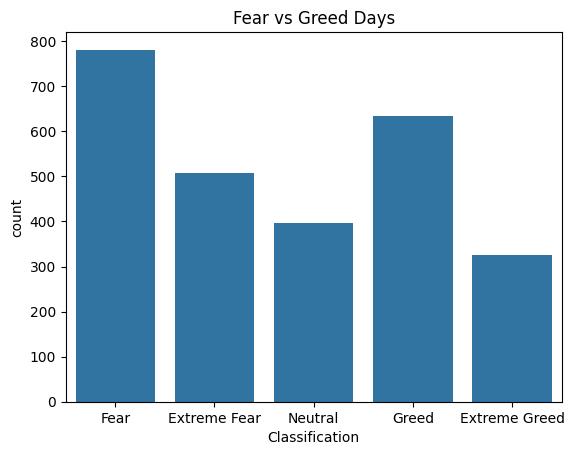

In [12]:
sns.countplot(x='Classification', data=fear_greed)
plt.title('Fear vs Greed Days')
plt.show()


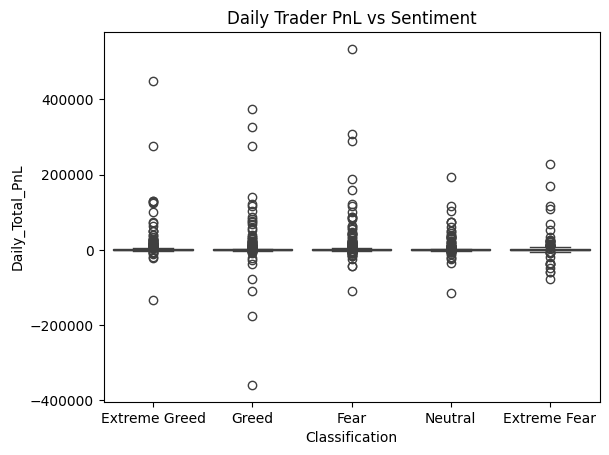

In [13]:
sns.boxplot(x='Classification', y='Daily_Total_PnL', data=merged_data)
plt.title('Daily Trader PnL vs Sentiment')
plt.show()


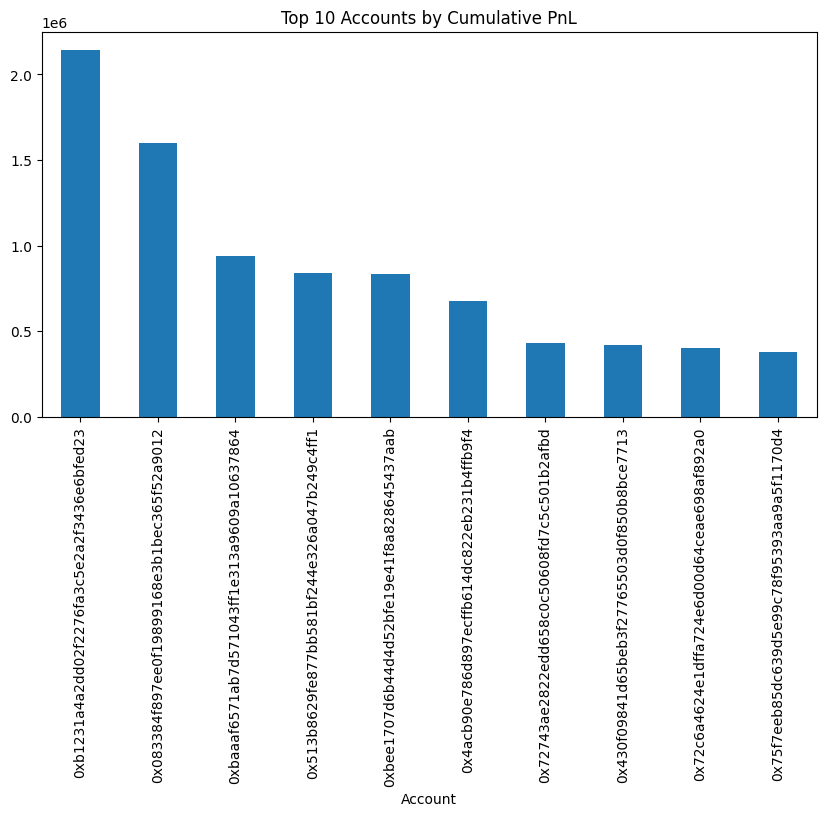

In [14]:
top_accounts = daily_pnl.groupby('Account')['Daily_Total_PnL'].sum().sort_values(ascending=False).head(10)
top_accounts.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Accounts by Cumulative PnL')
plt.show()


In [15]:
fear_days = merged_data[merged_data['Classification']=='Fear']['Daily_Total_PnL']
greed_days = merged_data[merged_data['Classification']=='Greed']['Daily_Total_PnL']

t_stat, p_val = ttest_ind(fear_days, greed_days, equal_var=False, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: 1.1539988578017337, P-value: 0.24871756720315527


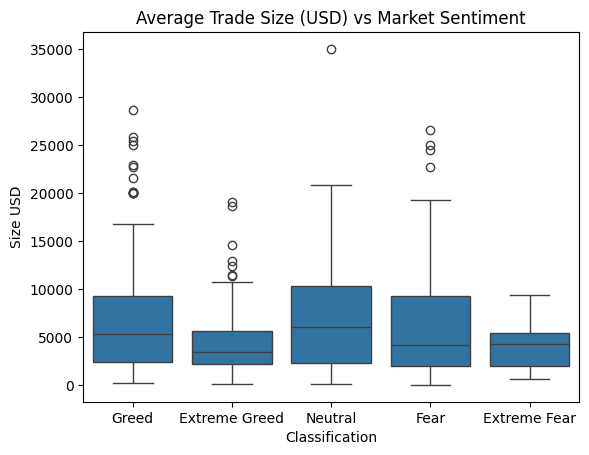

In [16]:
# Average trade size USD by sentiment
avg_size = trader_data.groupby(['Date'])['Size USD'].mean().reset_index()
avg_size = pd.merge(avg_size, fear_greed[['Date','Classification']], on='Date', how='left')

sns.boxplot(x='Classification', y='Size USD', data=avg_size)
plt.title('Average Trade Size (USD) vs Market Sentiment')
plt.show()


In [17]:
if 'leverage' in trader_data.columns:
    leverage_sentiment = pd.merge(trader_data[['Date','leverage']], fear_greed[['Date','Classification']], on='Date', how='left')

    sns.boxplot(x='Classification', y='leverage', data=leverage_sentiment)
    plt.title('Leverage vs Market Sentiment')
    plt.show()


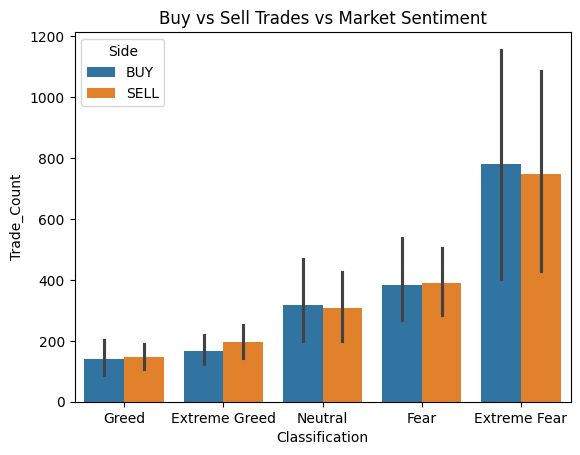

In [18]:
trade_side = trader_data.groupby(['Date','Side']).size().reset_index(name='Trade_Count')
trade_side = pd.merge(trade_side, fear_greed[['Date','Classification']], on='Date', how='left')

sns.barplot(x='Classification', y='Trade_Count', hue='Side', data=trade_side)
plt.title('Buy vs Sell Trades vs Market Sentiment')
plt.show()


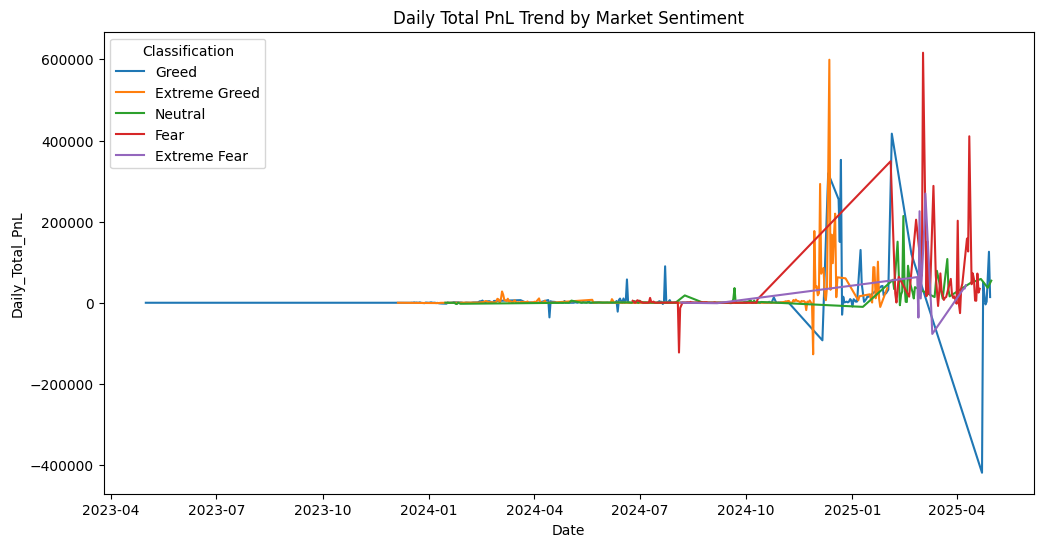

In [19]:
# Daily total PnL with sentiment overlay
daily_trend = merged_data.groupby(['Date','Classification'])['Daily_Total_PnL'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Daily_Total_PnL', hue='Classification', data=daily_trend)
plt.title('Daily Total PnL Trend by Market Sentiment')
plt.show()


In [20]:
merged_data.to_csv('/content/drive/MyDrive/Trader_Insights_Final.csv', index=False)


In [22]:
merged_data.head(10)

,Account,Date,Daily_Total_PnL,Classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.000000,Extreme Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.000000,Extreme Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.000000,Extreme Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.000000,Extreme Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.100000,Extreme Greed
5,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-28,-132271.000000,Extreme Greed
6,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-30,0.000000,Extreme Greed
7,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-12-06,-175611.000056,Greed
8,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-19,71393.964098,Extreme Greed
9,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-20,40218.599998,Extreme Greed


**Final Output in Visual way**

<Axes: xlabel='Classification', ylabel='Daily_Total_PnL'>

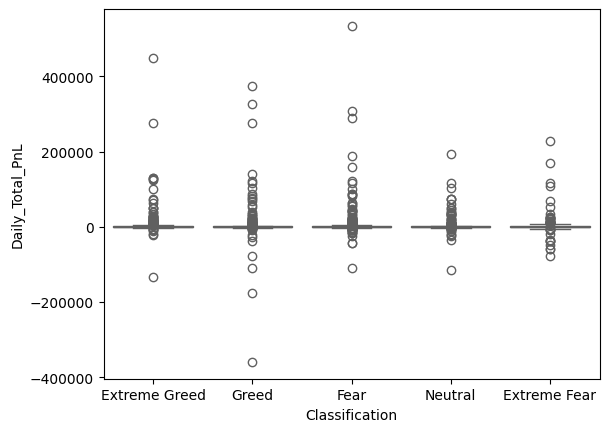

In [30]:
#PnL Distribution by Sentiment
sns.boxplot(
    x='Classification',
    y='Daily_Total_PnL',
    data=merged_data,
    hue='Classification',
    palette='coolwarm',
    legend=False
)



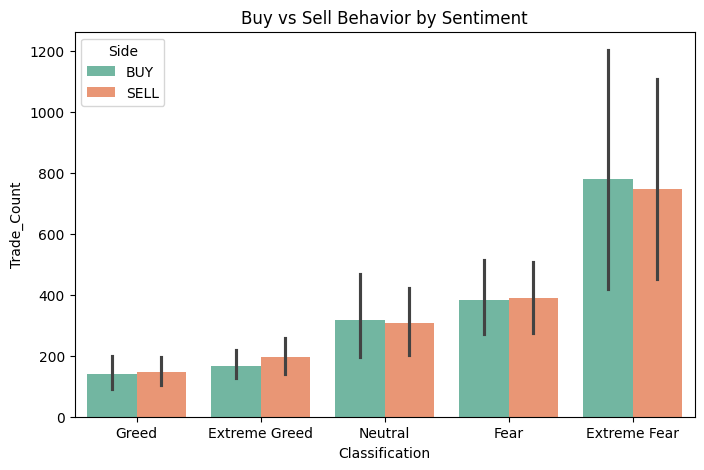

In [26]:
# Buy vs Sell Trade Counts
trade_side = trader_data.groupby(['Date','Side']).size().reset_index(name='Trade_Count')
trade_side = pd.merge(trade_side, fear_greed[['Date','Classification']], on='Date', how='left')

plt.figure(figsize=(8,5))
sns.barplot(x='Classification', y='Trade_Count', hue='Side', data=trade_side, palette='Set2')
plt.title('Buy vs Sell Behavior by Sentiment')
plt.show()


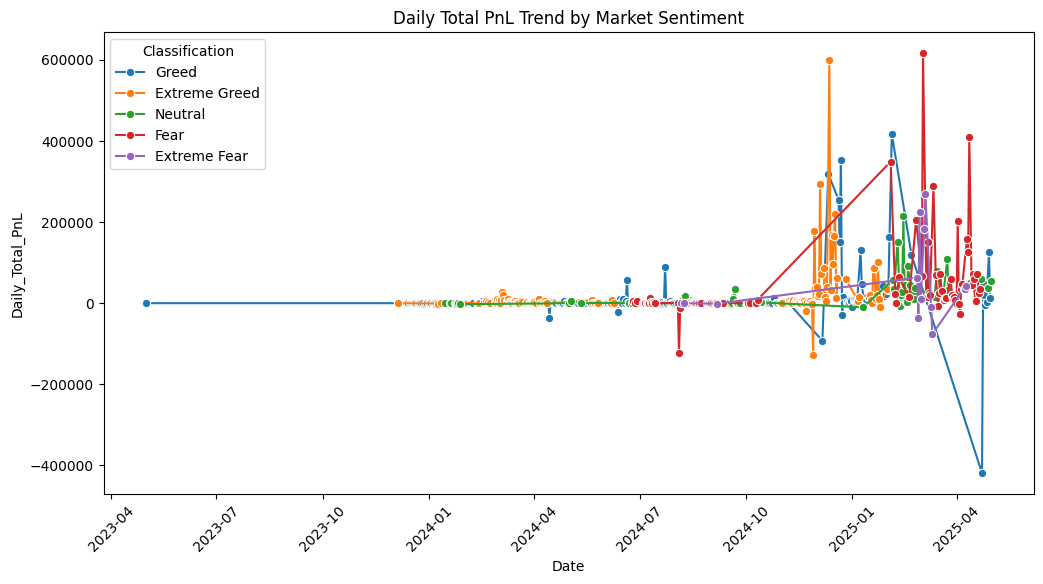

In [27]:
# Total PnL Trend with Sentiment Overlay
daily_trend = merged_data.groupby(['Date','Classification'])['Daily_Total_PnL'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Daily_Total_PnL', hue='Classification', data=daily_trend, marker='o')
plt.title('Daily Total PnL Trend by Market Sentiment')
plt.xticks(rotation=45)
plt.show()


In [28]:
# Summary Table
summary = merged_data.groupby('Classification')['Daily_Total_PnL'].agg(['mean','median','std','count']).reset_index()
summary


,Classification,mean,median,std,count
0,Extreme Fear,4619.439053,218.377399,29534.839183,160
1,Extreme Greed,5161.922644,418.319862,27496.863832,526
2,Fear,5328.818161,107.892532,31659.771538,630
3,Greed,3318.100730,158.214922,30599.040173,648
4,Neutral,3438.618818,167.551743,17447.863645,376
